<a href="https://colab.research.google.com/github/tarumi283/tarumi/blob/main/Hodgkin_Huxley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy.integrate as integrate
 
#const.
C_m  =   1.0   #membrane capacitance, in uF/cm^2
g_Na = 120.0   #Sodium (Na) maximum conductances, in mS/cm^2
g_K  =  36.0   #Postassium (K) maximum conductances, in mS/cm^2
g_L  =   0.3   #Leak maximum conductances, in mS/cm^2
E_Na =  50.0   #Sodium (Na) Nernst reversal potentials, in mV
E_K  = -77.0   #Postassium (K) Nernst reversal potentials, in mV
E_L  = -54.387 #Leak Nernst reversal potentials, in mV"""
 
dt = 0.01
t = np.arange(0.0, 50.0, dt) #The time to integrate over 
len_t = len(t) 
timestep = 20 #timestep
 
timecount = 0 #global

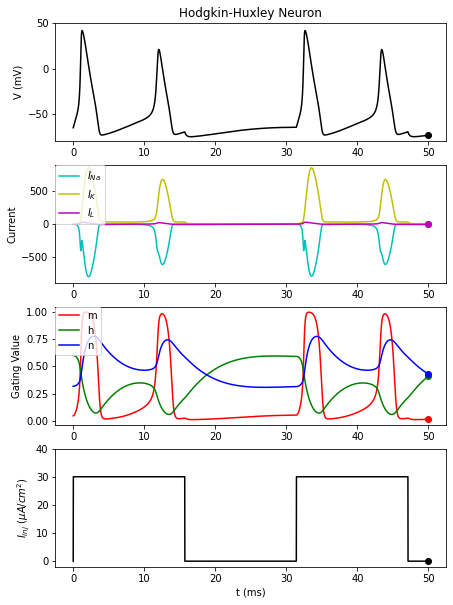

In [4]:
def alpha_m(V):
    """Channel gating kinetics. Functions of membrane voltage"""
    return 0.1*(V+40.0)/(1.0 - np.exp(-(V+40.0) / 10.0))
 
def beta_m(V):
    """Channel gating kinetics. Functions of membrane voltage"""
    return 4.0*np.exp(-(V+65.0) / 18.0)
 
def alpha_h(V):
    """Channel gating kinetics. Functions of membrane voltage"""
    return 0.07*np.exp(-(V+65.0) / 20.0)
 
def beta_h(V):
    """Channel gating kinetics. Functions of membrane voltage"""
    return 1.0/(1.0 + np.exp(-(V+35.0) / 10.0))
 
def alpha_n(V):
    """Channel gating kinetics. Functions of membrane voltage"""
    return 0.01*(V+55.0)/(1.0 - np.exp(-(V+55.0) / 10.0))
 
def beta_n(V):
    """Channel gating kinetics. Functions of membrane voltage"""
    return 0.125*np.exp(-(V+65) / 80.0)
 
def I_Na(V, m, h):
    """Membrane current (in uA/cm^2): Sodium (Na = element name)"""
    return g_Na * m**3 * h * (V - E_Na)
 
def I_K(V, n):
    """Membrane current (in uA/cm^2): Potassium (K = element name)"""
    return g_K  * n**4 * (V - E_K)
 
#  Leak
def I_L(V):
    """Membrane current (in uA/cm^2): Leak"""
    return g_L * (V - E_L)
 
def I_inj(t,timecount):
    y = np.sin((t + timecount*dt*timestep)/5)
    I = 30*np.where(y>0,1,0)
    return I
 
def dALLdt(X, t):
    global timecount
    """Integrate"""
    V, m, h, n = X
     
    dVdt = (I_inj(t, timecount) - I_Na(V, m, h) - I_K(V, n) - I_L(V)) / C_m
    dmdt = alpha_m(V)*(1.0-m) - beta_m(V)*m
    dhdt = alpha_h(V)*(1.0-h) - beta_h(V)*h
    dndt = alpha_n(V)*(1.0-n) - beta_n(V)*n
    return dVdt, dmdt, dhdt, dndt
 
 
fig, (ax1, ax2, ax3,ax4) = plt.subplots(nrows=4,ncols=1, figsize=(7,10))
#fig.tight_layout()
   
#animationの1step
def update(i):
    global X, X0, timecount
     
    #y0の初期値の設定
    if i ==0:
        X0 = [-65, 0.05, 0.6, 0.32]
     
    #現在描写されているグラフを消去
    ax1.cla()
    ax2.cla()
    ax3.cla()
    ax4.cla()
     
    timecount = i
     
    #微分方程式を解く
    X = integrate.odeint(dALLdt, X0, t)
     
    V = X[:,0]
    m = X[:,1]
    h = X[:,2]
    n = X[:,3]
    ina = I_Na(V, m, h)
    ik = I_K(V, n)
    il = I_L(V)
     
    #timestep後のyの値を次のステップでのy0の値に更新する
    X0 = (V[timestep], m[timestep], h[timestep], n[timestep]) 
     
    #描画
    ax1.set_title('Hodgkin-Huxley Neuron')
    ax1.plot(t, V, 'k')
    ax1.plot(t[len_t-1],V[len_t-1],'ko')
    ax1.set_ylabel('V (mV)')
    ax1.set_ylim([-80,50])
    ax2.grid()
     
    ax2.plot(t, ina, 'c', label='$I_{Na}$')
    ax2.plot(t, ik, 'y', label='$I_{K}$')
    ax2.plot(t, il, 'm', label='$I_{L}$')
    ax2.plot(t[len_t-1],ina[len_t-1],'co')
    ax2.plot(t[len_t-1],ik[len_t-1],'yo')
    ax2.plot(t[len_t-1],il[len_t-1],'mo')
    ax2.set_ylabel('Current')
    ax2.set_ylim([-900,900])
    ax2.grid()
    ax2.legend(bbox_to_anchor=(0, 1),
           loc='upper left',
           borderaxespad=0)
     
    ax3.plot(t, m, 'r', label='m')
    ax3.plot(t, h, 'g', label='h')
    ax3.plot(t, n, 'b', label='n')
    ax3.plot(t[len_t-1],m[len_t-1],'ro')
    ax3.plot(t[len_t-1],h[len_t-1],'go')
    ax3.plot(t[len_t-1],n[len_t-1],'bo')
    ax3.set_ylabel('Gating Value')
    ax3.legend(bbox_to_anchor=(0, 1),
               loc='upper left',
               borderaxespad=0)
     
    i_inj_values = [I_inj(t,timecount) for t in t]
    ax4.plot(t, i_inj_values, 'k')
    ax4.plot(t[len_t-1], i_inj_values[len_t-1],'ko')
    ax4.set_xlabel('t (ms)')
    ax4.set_ylabel('$I_{inj}$ ($\\mu{A}/cm^2$)')
    ax4.set_ylim(-2, 40)
 
ani = animation.FuncAnimation(fig, update, interval=100,
                              frames=100)
plt.show() #表示

In [3]:
ani.save("Hodgkin-Huxley.mp4") #保存

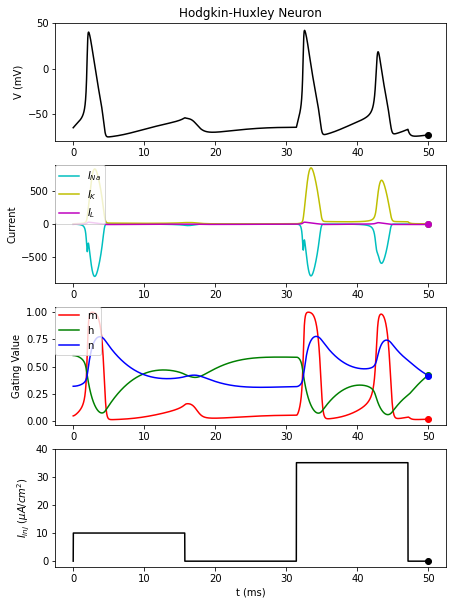

In [6]:
def alpha_m(V):
    """Channel gating kinetics. Functions of membrane voltage"""
    return 0.1*(V+40.0)/(1.0 - np.exp(-(V+40.0) / 10.0))
 
def beta_m(V):
    """Channel gating kinetics. Functions of membrane voltage"""
    return 4.0*np.exp(-(V+65.0) / 18.0)
 
def alpha_h(V):
    """Channel gating kinetics. Functions of membrane voltage"""
    return 0.07*np.exp(-(V+65.0) / 20.0)
 
def beta_h(V):
    """Channel gating kinetics. Functions of membrane voltage"""
    return 1.0/(1.0 + np.exp(-(V+35.0) / 10.0))
 
def alpha_n(V):
    """Channel gating kinetics. Functions of membrane voltage"""
    return 0.01*(V+55.0)/(1.0 - np.exp(-(V+55.0) / 10.0))
 
def beta_n(V):
    """Channel gating kinetics. Functions of membrane voltage"""
    return 0.125*np.exp(-(V+65) / 80.0)
 
def I_Na(V, m, h):
    """Membrane current (in uA/cm^2): Sodium (Na = element name)"""
    return g_Na * m**3 * h * (V - E_Na)
 
def I_K(V, n):
    """Membrane current (in uA/cm^2): Potassium (K = element name)"""
    return g_K  * n**4 * (V - E_K)
 
#  Leak
def I_L(V):
    """Membrane current (in uA/cm^2): Leak"""
    return g_L * (V - E_L)
 
def I_inj(t,timestep):
    y1 = np.sin((t + timecount*dt*timestep)/5)
    y2 = np.sin((t + timecount*dt*timestep)/10) #周期はy1の2倍
     
    #sin波をstep関数に変換
    sq_y1 = np.where(y1 > 0,1,0)
    sq_y2 = np.where(y2 > 0,1,0)
     
    I = 10*sq_y1*sq_y2 + 35*sq_y1*(1-sq_y2)
    return I
 
def dALLdt(X, t):
    global timecount
    """Integrate"""
    V, m, h, n = X
     
    dVdt = (I_inj(t, timecount) - I_Na(V, m, h) - I_K(V, n) - I_L(V)) / C_m
    dmdt = alpha_m(V)*(1.0-m) - beta_m(V)*m
    dhdt = alpha_h(V)*(1.0-h) - beta_h(V)*h
    dndt = alpha_n(V)*(1.0-n) - beta_n(V)*n
    return dVdt, dmdt, dhdt, dndt
 
 
fig, (ax1, ax2, ax3,ax4) = plt.subplots(nrows=4,ncols=1, figsize=(7,10))
#fig.tight_layout()
   
#animationの1step
def update(i):
    global X, X0, timecount
     
    #y0の初期値の設定
    if i ==0:
        X0 = [-65, 0.05, 0.6, 0.32]
     
    #現在描写されているグラフを消去
    ax1.cla()
    ax2.cla()
    ax3.cla()
    ax4.cla()
     
    timecount = i
     
    #微分方程式を解く
    X = integrate.odeint(dALLdt, X0, t)
     
    V = X[:,0]
    m = X[:,1]
    h = X[:,2]
    n = X[:,3]
    ina = I_Na(V, m, h)
    ik = I_K(V, n)
    il = I_L(V)
     
    #timestep後のyの値を次のステップでのy0の値に更新する
    X0 = (V[timestep], m[timestep], h[timestep], n[timestep]) 
     
    #描画
    ax1.set_title('Hodgkin-Huxley Neuron')
    ax1.plot(t, V, 'k')
    ax1.plot(t[len_t-1],V[len_t-1],'ko')
    ax1.set_ylabel('V (mV)')
    ax1.set_ylim([-80,50])
    ax2.grid()
     
    ax2.plot(t, ina, 'c', label='$I_{Na}$')
    ax2.plot(t, ik, 'y', label='$I_{K}$')
    ax2.plot(t, il, 'm', label='$I_{L}$')
    ax2.plot(t[len_t-1],ina[len_t-1],'co')
    ax2.plot(t[len_t-1],ik[len_t-1],'yo')
    ax2.plot(t[len_t-1],il[len_t-1],'mo')
    ax2.set_ylabel('Current')
    ax2.set_ylim([-900,900])
    ax2.grid()
    ax2.legend(bbox_to_anchor=(0, 1),
           loc='upper left',
           borderaxespad=0)
     
    ax3.plot(t, m, 'r', label='m')
    ax3.plot(t, h, 'g', label='h')
    ax3.plot(t, n, 'b', label='n')
    ax3.plot(t[len_t-1],m[len_t-1],'ro')
    ax3.plot(t[len_t-1],h[len_t-1],'go')
    ax3.plot(t[len_t-1],n[len_t-1],'bo')
    ax3.set_ylabel('Gating Value')
    ax3.legend(bbox_to_anchor=(0, 1),
               loc='upper left',
               borderaxespad=0)
     
    i_inj_values = [I_inj(t,timecount) for t in t]
    ax4.plot(t, i_inj_values, 'k')
    ax4.plot(t[len_t-1], i_inj_values[len_t-1],'ko')
    ax4.set_xlabel('t (ms)')
    ax4.set_ylabel('$I_{inj}$ ($\\mu{A}/cm^2$)')
    ax4.set_ylim(-2, 40)
 
ani = animation.FuncAnimation(fig, update, interval=100,
                              frames=100)
plt.show() #表示

In [8]:
ani.save("Hodgkin-Huxley_stim_c.mp4") #保存